In [ ]:
import pickle
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
## This opens a *.pkl file

def unpickle(filename):
    with open(filename, "rb") as f:
        data = pickle.load(f)
    return data

# this saves "thing" to a *.pkl file
def to_pickle(thing, filename):
    with open(filename, "wb") as f:
        pickle.dump(thing, f)
        f.close()

In [ ]:
train = unpickle("./train.pkl")
print(train["data"].shape)
print(train["label"].shape)

(10000, 12288)
(10000,)


In [ ]:
# label dictionary: this maps label integer to the name of the animal
label2name = {1: 'dog',
              2: 'rabbit',
              3: 'deer',
              4: 'elephant',
              5: 'horse',
              6: 'squirrel',
              7: 'tiger',
              8: 'wolf',
              9: 'chimpanzee',
              10: 'panda'}

In [ ]:
# this plot one image given the image index
def show_image(idx, train, label2name=label2name):
    img = train["data"][idx]
    img = np.dstack((img[:4096], img[4096:8192], img[8192:])).reshape(64,64,3)
    plt.imshow(img)
    plt.title(label2name[train["label"][idx]])
    plt.show()

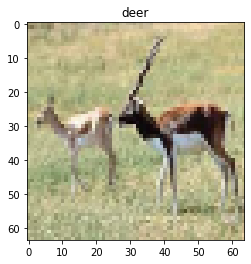

In [ ]:
show_image(3, train)

In [ ]:
import numpy as np
#from tensorflow.keras.applications.vgg19 import VGG19
#from tensorflow.keras.applications.resnet import ResNet50
#from tensorflow.keras.applications.xception import Xception
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

#Get training data and labels
x_train = train["data"]
y_train = train["label"]


#Resize to be between 0 and 1
x_train = x_train / 255

#   x_train   ->  new_x_train   ->      Reshape
#(100, 12288) -> (100, 3, 4096) -> (100, 3, 64, 64)
new_x_train = np.zeros((100, 3, 4096))
for i in range(0,100):
  k = 0
  for j in range(0, 4095):
    new_x_train[i][0][k] = x_train[i][j] #Red Values
    k = k + 1

  k = 0
  for j in range(4096, 8191):
    new_x_train[i][1][k] = x_train[i][j] #Green Values
    k = k + 1

  k = 0
  for j in range(8192, 12287):
    new_x_train[i][2][k] = x_train[i][j] #Blue Values
    k = k + 1

new_x_train = np.reshape(new_x_train, ((100, 64, 64, 3)))
print("new_x_train.shape =", new_x_train.shape)

#One Hot Encoding
#y_train  -> new_y_train 
#(10000,) -> (10000, 10)
new_y_train = np.zeros((10000, 10))
for i in range(0,10000):
  #Insert 1 in necessary place
  j = y_train[i] - 1
  new_y_train[i][j] = 1
    
print("new_y_train.shape =",new_y_train.shape)


# Import the trained neural network model, minus it's last (top) neuron layer.
#base_model = ResNet50(weights = 'imagenet',
#                  include_top = False,
#                  input_shape = (64, 64, 3),
#                  pooling = None)
# 
 
# This freezes the weights of the pretrained model.
#for layer in base_model.layers: 
#   layer.trainable = False
 
#Build and Compile Model
#num_digits = 10
#model = keras.Sequential(
#  [
#      base_model,
#      keras.layers.GlobalAveragePooling2D(),
#      #layers.Dense(num_digits*20, activation="ReLU"),
#      layers.Dense(num_digits*5, activation="ReLU"),
#      layers.Dense(num_digits, activation="softmax"),
#  ]
#)
#opt = keras.optimizers.Adam(learning_rate=0.01)
#model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=["accuracy"])


#make model
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

#TESTING - FOR Xception
#new_x_train = np.pad(new_x_train, 4)
#new_x_train = np.delete(new_x_train, 10, 3)
#new_x_train = np.delete(new_x_train, 9, 3)
#new_x_train = np.delete(new_x_train, 8, 3)
#new_x_train = np.delete(new_x_train, 7, 3)
#new_x_train = np.delete(new_x_train, 3, 3)
#new_x_train = np.delete(new_x_train, 2, 3)
#new_x_train = np.delete(new_x_train, 1, 3)
#new_x_train = np.delete(new_x_train, 0, 3)
 
# Train the model
batch_size = 50
epochs = 40
History = model.fit(new_x_train, new_y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


# NOW WITH TESTING DATA
print("\nNow With Test Data:")
#Get testing data
test = unpickle("./test.pkl")
x_test = test["data"]
print("x_test.shape =", x_test.shape)

#   x_test     ->    new_x_test   ->      Reshape
#(2000, 12288) -> (2000, 3, 4096) -> (2000, 3, 64, 64)
new_x_test = np.zeros((2000, 3, 4096))
for i in range(0,2000):
  k = 0
  for j in range(0, 4095):
    new_x_test[i][0][k] = x_test[i][j] #Red Values
    k = k + 1

  k = 0
  for j in range(4096, 8191):
    new_x_test[i][1][k] = x_test[i][j] #Green Values
    k = k + 1

  k = 0
  for j in range(8192, 12287):
    new_x_test[i][2][k] = x_test[i][j] #Blue Values
    k = k + 1

new_x_test = np.reshape(new_x_test, ((2000, 64, 64, 3)))
print("new_x_test.shape =", new_x_test.shape)
 

new_x_train.shape = (100, 64, 64, 3)
new_y_train.shape = (10000, 10)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_____________________________________________________

In [ ]:
def show_image2(idx, train, label2name=label2name):
    img = train["data"][idx]
    img = np.dstack((img[:4096], img[4096:8192], img[8192:])).reshape(64,64,3)
    plt.imshow(img)
    plt.show()

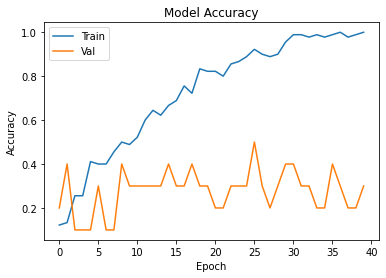

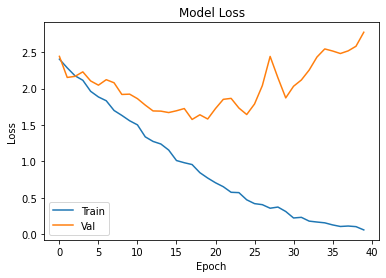

In [ ]:
def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()

plot_accuracies(History)
plot_losses(History)

In [ ]:
#TESTING - FOR Xception
#new_x_test = np.pad(new_x_test, 4)
#new_x_test = np.delete(new_x_test, 10, 3)
#new_x_test = np.delete(new_x_test, 9, 3)
#new_x_test = np.delete(new_x_test, 8, 3)
#new_x_test = np.delete(new_x_test, 7, 3)
#new_x_test = np.delete(new_x_test, 3, 3)
#new_x_test = np.delete(new_x_test, 2, 3)
#new_x_test = np.delete(new_x_test, 1, 3)
#new_x_test = np.delete(new_x_test, 0, 3)


In [ ]:
#Predict for new_x_test
predictions = model.predict(new_x_test)
#np.set_printoptions(suppress=True)
#print("predictions.shape =", predictions.shape) #Should be (2000, 10)


In [ ]:
#1: 'dog',
#2: 'rabbit',
#3: 'deer',
#4: 'elephant',
#5: 'horse',
#6: 'squirrel',
#7: 'tiger',
#8: 'wolf',
#9: 'chimpanzee',
#10: 'panda'

In [ ]:
#Convert One Hot Encoding into 1-10
pred_arr = np.zeros(2000)
for i in range(0, 2000):
 pred_max = 0 #Reset after each prediction
 for j in range(0, 10):
   if predictions[i][j] > pred_max:
     pred_max = predictions[i][j]
     pred_arr[i] = j+1 #1-10 not 0-9
 

In [ ]:
#Output predictions to file
original_df = pd.DataFrame({"id": range(2000), "label": pred_arr})
original_df = original_df.astype(int)
original_df.to_csv("./sample_submission.csv", index=False)